# MCMC1.5: How to Plot

## Plots.jl

In Julia, the most general framework for plotting is Plots.jl, which includes many backends. If you are used to Python, then Plots.jl should be overkill. Just call PyPlot instead.

In [1]:
using Plots

Of course, PyPlot is also included in Plots.jl. However, it is the slowest choice in Julia.

In [2]:
pyplot()

Plots.PyPlotBackend()

The method pyplot will switch to the PyPlot.jl (if installed), but I won't use it today. Currently I recommend to use GR or PlotlyJS. PlotlyJS is faster but unstable. Sometimes it is difficult to build PlotlyJS while you are adding PlotlyJS.jl package.

In [4]:
plotlyjs()

Plots.PlotlyJSBackend()

For the speed test, see https://github.com/albi3ro/Plots.jl_Examples.

## GR backend

If you cannot install PlotlyJS.jl, the first choice must be the GR backend, which is fast and very stable. You can switch to gr by the method gr.

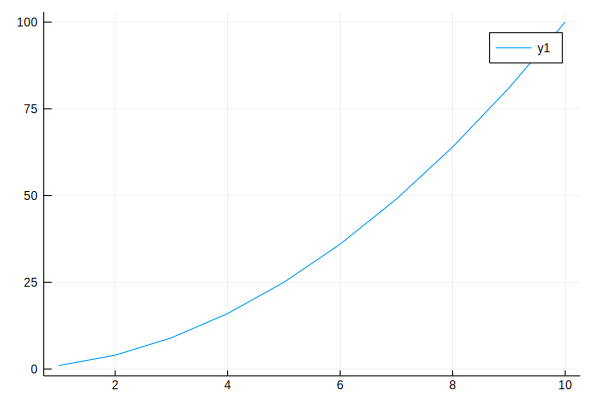

In [5]:
gr()
plot(1 : 10, (1 : 10) .^ 2)

plot! will add another graph.

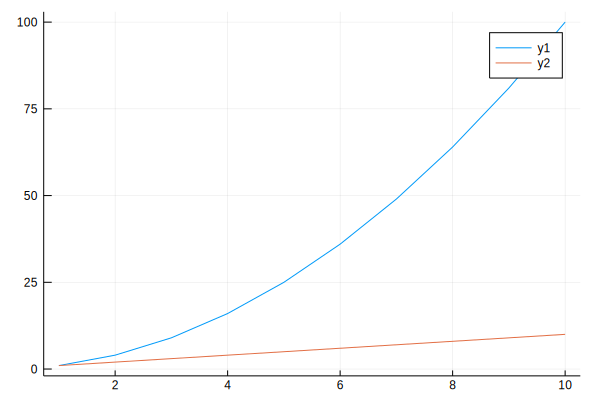

In [6]:
plot!(1 : 10, 1 : 10)

## Histogram

To see statistics graphically, you should check its histogram first.

In [7]:
using ResumableFunctions
@resumable function Ising1D()::Float64
    N = 1000
    σ = ones(Int64, N)
    β = 1.0
    step = 1
    while true
        for i in 1 : N
            j = rand(1 : N)
            ΔβE = 2β * σ[j] * (σ[mod1(j + 1, N)] + σ[mod1(j - 1, N)])
            -ΔβE > log(rand()) && (σ[j] = -σ[j])
        end
        if step > 10000
            @yield sum(σ) / N
        end
        step += 1
    end
end

Ising1D (generic function with 1 method)

For details of this code, see MCMC2.0 first. Let's just use the fact that Ising1D() returns an iterator, which iteratively produces magnetization samples of the 1D Ising model.

In [8]:
magnetization = Iterators.take(Ising1D(), 10000)

Base.Iterators.Take{getfield(Main, Symbol("##362"))}(getfield(Main, Symbol("##362"))(0x00, 5, #undef, 5, 5:4678233456, 4678233648, 2.2869196703e-314, 2.289778832e-314, 4634564016, nothing, 4639900592), 10000)

Iterators.take will take the first 10000 samples of the magnetization. If you want them in the form of a vector, just collect. Isn't it cool? Note that currently the first part of iteration was discarded inside Ising1D, but you can discard them afterwards by Iterators.drop.

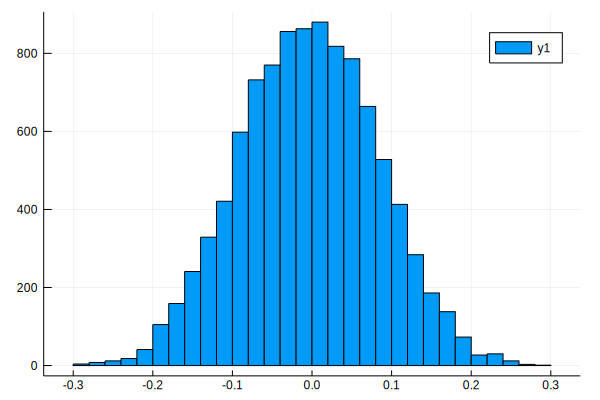

In [9]:
Mz = collect(magnetization)
histogram(Mz)

If it looks wierd, you can change binning.

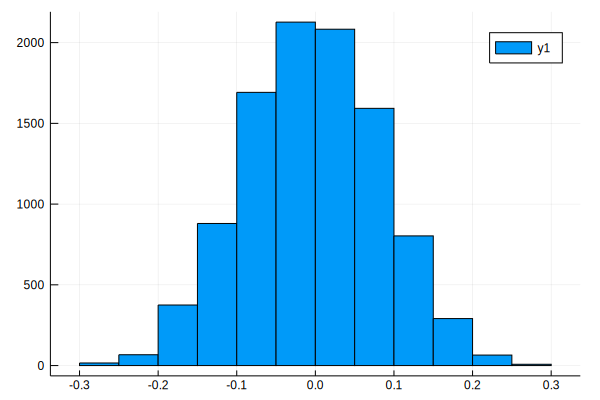

In [16]:
histogram(Mz, bins = 20)

## Scatter plot

The histogram was very easy. The scatter plot is easier.

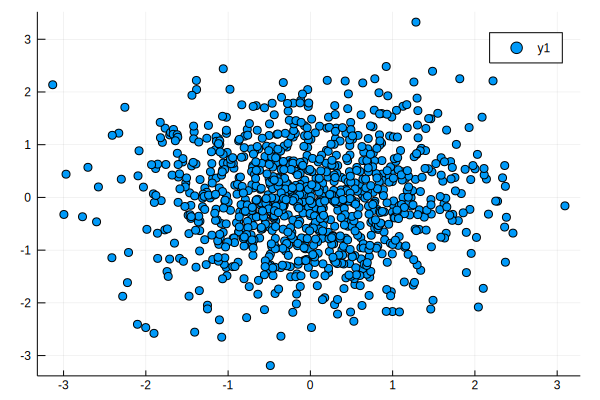

In [17]:
using Distributions
x = rand(Normal(), 1000)
y = rand(Normal(), 1000)
scatter(x, y)

This is a plot without correlation. In the correlated case,

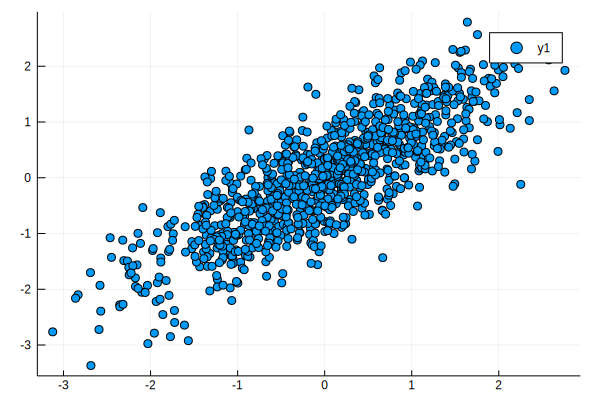

In [18]:
z = rand(MvNormal([0.0, 0.0], [1.0 0.8; 0.8 1.0]), 1000)
scatter(z[1, :], z[2, :])

Note that sending a matrix does not work because each column is regared as different data.

## Tips: animation

~ under construction ~